In [10]:
import numpy as np
import pyccl as ccl
import matplotlib
import matplotlib.pyplot as plt

In [11]:
# set up cosmologies in CCL
p1 = ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-1.0, wa=0.0)
p2 = ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.0)
p3 = ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.1)
p4 = ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.1)
p5 = ccl.Parameters(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.1)

p1.parameters.Omega_g = 0
p2.parameters.Omega_g = 0
p3.parameters.Omega_g = 0
p4.parameters.Omega_g = 0
p5.parameters.Omega_g = 0

p4.parameters.Omega_l = 0.65
p5.parameters.Omega_l = 0.75

# define the cosmology model to use
p = p3
cosmo = ccl.Cosmology(p)
a = 1
beta = 0.5102500557881973
rsd_bench = np.loadtxt('../tests/benchmark/model3_xiRSD.txt')

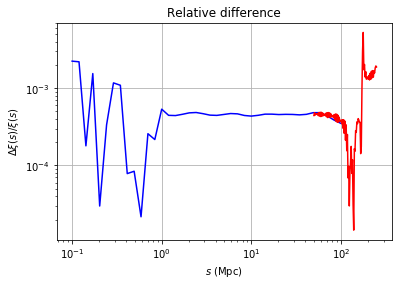

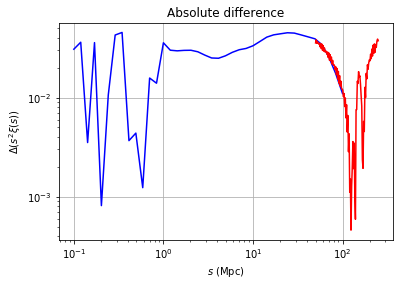

Max diff for s = 0.1-100: 0.04527382016672736
Max diff for s = 50-250: 0.038796943897711024
BAO peak height = max (s^2 xi) for s = 140-160 Mpc: 51.71152471864682
Average Delta(r^2 xi) for s = 140-150 Mpc: 0.010881527323687957


In [13]:
frac_diff1 = []    
frac_diff2 = []
abs_diff1 = []    
abs_diff2 = []

s1 = rsd_bench[0:40,0]
s2 = rsd_bench[40:140,0]

xi_ccl1 = ccl.correlation_3dRsd_avgmu(cosmo,a,s1,beta)
xi_cosmomad1 = rsd_bench[0:40,1]

xi_ccl2 = ccl.correlation_3dRsd_avgmu(cosmo,a,s2,beta)
xi_cosmomad2 = rsd_bench[40:140,1]

for i in range(len(s1)):
    frac_diff1.append(np.abs(xi_ccl1[i]/xi_cosmomad1[i] - 1.))
    abs_diff1.append(np.abs(s1[i]*s1[i]*(xi_ccl1[i]-xi_cosmomad1[i])))
    
for i in range(len(s2)):
    frac_diff2.append(np.abs(xi_ccl2[i]/xi_cosmomad2[i] - 1.))
    abs_diff2.append(np.abs(s2[i]*s2[i]*(xi_ccl2[i]-xi_cosmomad2[i])))
    
r2xi = np.array(s2*s2*xi_cosmomad2)

# plot relative and absolute difference in r^2 xi(r)
plt.plot(s1, frac_diff1, 'b-')
plt.plot(s2, frac_diff2, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$s$ (Mpc)')
plt.ylabel(r'$\Delta \xi(s) / \xi(s)$')
plt.grid(which='minor')
plt.title('Relative difference') 
plt.grid(which='both')
plt.savefig('benchmark_abs.pdf',bbox_inches = 'tight')
plt.show()

plt.plot(s1, abs_diff1, 'b-')
plt.plot(s2, abs_diff2, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$s$ (Mpc)')
plt.ylabel(r'$\Delta (s^2 \xi(s)) $')
plt.grid(which='minor')
plt.title('Absolute difference') 
plt.grid(which='both')
plt.savefig('benchmark_abs.pdf',bbox_inches = 'tight')
plt.show()

#print abs_diff
print(f'Max diff for s = 0.1-100: {np.amax(abs_diff1)}')
print(f'Max diff for s = 50-250: {np.amax(abs_diff2)}')
apex = np.amax(r2xi[(s2<160)&(s2>140)])
print(f'BAO peak height = max (s^2 xi) for s = 140-160 Mpc: {apex}')
# find and print the average of Delta(r^2 xi) in the BAO peak region
avg_value = np.average(np.array(abs_diff2)[(140<s2) & (s2<150)])
print(f'Average Delta(r^2 xi) for s = 140-150 Mpc: {avg_value}')